### 가정
- 수소차 충전소 위치는 변수~변수 만 고려하여 위치를 선정.
- 기존 설치된 수소차 충전소는 위 고려사항을 충분히 고려하여 만들어진 곳이다.
- 수소차 충전소는 전방 약 ~m를 커버할 수 있다.

### 분석 방법
- 고려되는 모든 변수들은 정규화
- 선형회귀분석을 이용해 구한 데이터로부터 수소차 충전소 위치에 영향을 주는 요소의 관계를 분석(Linear Regression)
- INPUT : 차량등록수, 생산가능인구수, 교통노드,	건물연면적, 관광상권, 부동산상권,	생활서비스상권,	소매상권, 숙박상권,	스포츠상권, 음식상권, 학문상권, 유치원초중고, 화재발생건수, 교통량
         
- OUTPUT : 고려되는 요소들과 충전소 사이의 상관계수


### 1.데이터 불러오기

In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/2.사용_데이터(정제데이터)/4. 선형회귀 돌릴 데이터/1.5km/gid_1_5km(0제외).csv", encoding ="cp949")

In [2]:
df = df.iloc[:,1:]

In [3]:
df

,차량등록수,생산가능인구수,교통노드,건물연면적,관광상권,부동산상권,생활서비스상권,소매상권,숙박상권,스포츠상권,음식상권,학문상권,유치원초중고,화재발생건수,교통량,종속변수_수소차
0,0,95,0,1037.35,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.00,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21333,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
21334,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
21335,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
21336,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0


### 1-1. EDA (이상치 확인하기)

In [4]:
df.columns

Index(['차량등록수', '생산가능인구수', '교통노드', '건물연면적', '관광상권', '부동산상권', '생활서비스상권', '소매상권',
       '숙박상권', '스포츠상권', '음식상권', '학문상권', '유치원초중고', '화재발생건수', '교통량', '종속변수_수소차'],
      dtype='object')

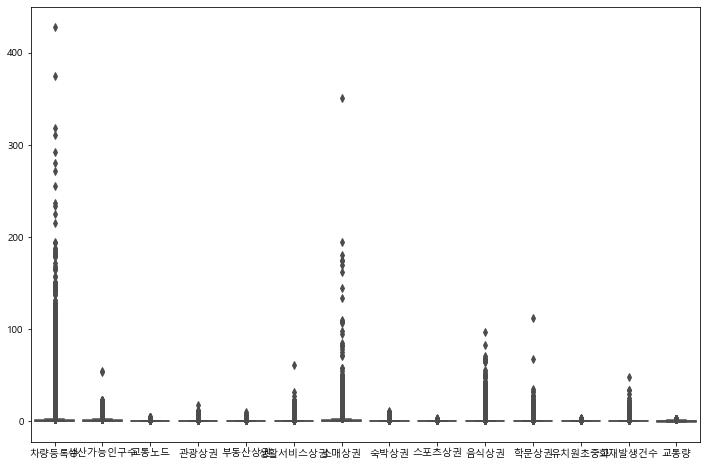

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )


#warning 메시지 표시 안하게 하기
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12,8))
sns.boxplot(data = df[['차량등록수', '생산가능인구수', '교통노드', '관광상권','부동산상권', '생활서비스상권', '소매상권', '숙박상권', '스포츠상권', '음식상권', '학문상권', '유치원초중고','화재발생건수', '교통량']],color='red')
plt.show()

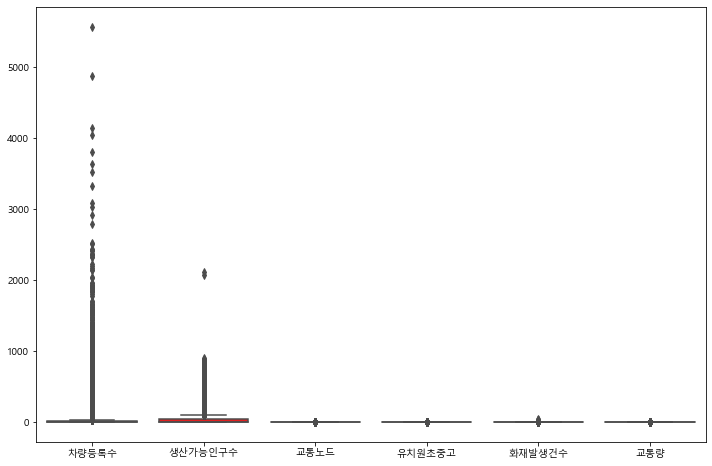

In [6]:
# 상권 제외 이상치 확인
plt.figure(figsize=(12,8))
sns.boxplot(data = df[['차량등록수', '생산가능인구수', '교통노드','유치원초중고','화재발생건수', '교통량']],color='red')
plt.show()

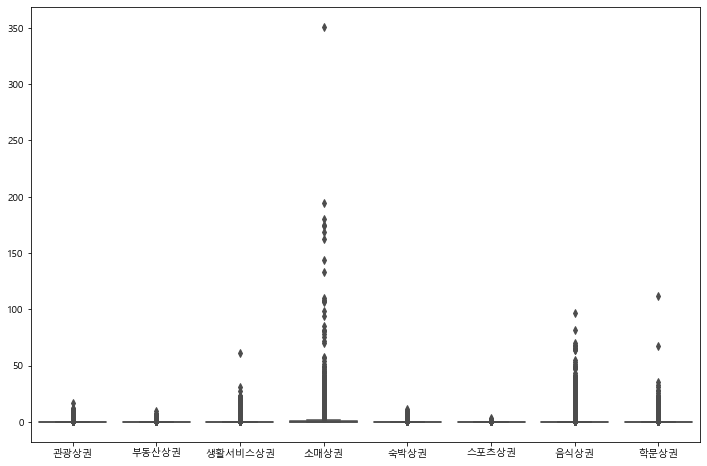

In [7]:
# 상권 이상치 확인
plt.figure(figsize=(12,8))
sns.boxplot(data = df[['관광상권','부동산상권', '생활서비스상권', '소매상권', '숙박상권', '스포츠상권', '음식상권', '학문상권']],color='red')
plt.show()

### 2. 데이터 정규화
참고 사이트 : https://rfriend.tistory.com/269

#### 범주형 x값 
교통량, 교통노드 

In [5]:
# 이상치에 영향을 받지 않는 RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df.iloc[:,:-1] = robust_scaler.fit_transform(df.iloc[:,:-1])

In [9]:
# # 이상치에 영향을 받지 않는 StandardScaler
# from sklearn.preprocessing import StandardScaler
# standard_scaler = StandardScaler()
# standard_x = standard_scaler.fit_transform(df.iloc[:,:-1])

In [10]:
# MinMaxScaler 전처리 (이상치에 영향을 받는다.)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df.iloc[:,3:-1]=scaler.fit_transform(df.iloc[:,3:-1])

In [6]:
df['종속변수_수소차'].value_counts()

0    17088
1     4250
Name: 종속변수_수소차, dtype: int64

### 3. 회귀분석

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

X = df.iloc[:,:-1] # 독립변수
y = df.iloc[:,-1] # 종속변수
reg = linear_model.LinearRegression()
reg.fit(X,y)

H_coeff = reg.coef_
print('수소차충전소 Intercept: ', reg.intercept_)
print('수소차충전소 Coefficients: \n', H_coeff)

수소차충전소 Intercept:  0.3285831105566162
수소차충전소 Coefficients: 
 [-6.68451041e-06 -5.31631721e-04  7.57682476e-03 -2.23011602e-06
  6.32005300e-03  8.21304713e-03 -9.84644250e-03  2.21465246e-04
 -2.72283255e-02  2.06605904e-02 -4.98260211e-03  2.75395128e-03
 -1.17076171e-01 -7.26620777e-03 -1.19065677e-01]


### 4. LinearSVC 예측력 확인하기 및 coef 계산

In [29]:
score = []
for i in range(0,100):
    np.random.seed(i) 

    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)
    
    mlr = LinearSVC()
    mlr.fit(x_train,y_train)
    score.append(mlr.score(x_test,y_test))
score.index(max(score))

73

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(73) 

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [31]:
from sklearn.svm import LinearSVC

X = x_train
y = y_train

linear_svc = LinearSVC().fit(X,y)

H_svc_coeff = linear_svc.coef_
print('수소차충전소 intercept: ', linear_svc.intercept_)
print('수소차충전소 Coefficients: \n', H_svc_coeff)

수소차충전소 intercept:  [-0.56085971]
수소차충전소 Coefficients: 
 [[-0.02613981 -0.0627327   0.05560369 -0.02891693  0.0434454   0.05497798
  -0.01388765 -0.03146724 -0.13980688  0.13200103 -0.01999383  0.01741908
  -0.3201225  -0.0466405  -0.33237972]]


In [32]:
from sklearn.svm import LinearSVC

mlr = LinearSVC()
mlr.fit(x_train,y_train)

LinearSVC()

In [33]:
y_predict = mlr.predict(x_test)

In [34]:
print(mlr.score(x_test,y_test))

0.8149015932521088


### 5. LPG 버퍼 데이터(2km) 점수 내기

In [35]:
import pandas as pd
lpg_buffer=pd.read_csv("C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/2.사용_데이터(정제데이터)/1.QGIS에 사용할 데이터(gid 가능데이터)/gid포함 csv파일/수소차버퍼, lpg버퍼 격자데이터/lpg버퍼격자 1.5km.csv",encoding='cp949')
lpg_buffer = lpg_buffer[['소재지','gid']]
include_0_df = pd.read_csv("C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/2.사용_데이터(정제데이터)/4. 선형회귀 돌릴 데이터/1.5km/gid_1_5km.csv",encoding='cp949')


In [36]:
lpg_buffer

,소재지,gid
0,대전 대덕구 상서동 441-3,다바928260
1,대전 대덕구 상서동 441-3,다바931257
2,대전 대덕구 상서동 441-3,다바919249
3,대전 대덕구 상서동 441-3,다바928262
4,대전 대덕구 상서동 441-3,다바918260
...,...,...
28339,대전 중구 중촌동 413-43,다바917165
28340,대전 중구 중촌동 413-43,다바913167
28341,대전 중구 중촌동 413-43,다바916179
28342,대전 중구 중촌동 413-43,다바914164


In [37]:
gid1 = lpg_buffer.merge(include_0_df,on='gid',how='inner')
gid1

,소재지,gid,차량등록수,생산가능인구수,교통노드,건물연면적,관광상권,부동산상권,생활서비스상권,소매상권,숙박상권,스포츠상권,음식상권,학문상권,유치원초중고,화재발생건수,congestion,종속변수_수소차
0,대전 대덕구 상서동 441-3,다바928260,40,65,2,1487.49,0,0,0,0,0,0,0,0,0,0,1.0,1.0
1,대전 대덕구 상서동 349-12,다바928260,40,65,2,1487.49,0,0,0,0,0,0,0,0,0,0,1.0,1.0
2,대전 대덕구 상서동 440,다바928260,40,65,2,1487.49,0,0,0,0,0,0,0,0,0,0,1.0,1.0
3,대전 대덕구 평촌동 226-5,다바928260,40,65,2,1487.49,0,0,0,0,0,0,0,0,0,0,1.0,1.0
4,대전 대덕구 상서동 236-32,다바928260,40,65,2,1487.49,0,0,0,0,0,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28339,대전 중구 석교동 17-2,다바945109,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0.0
28340,대전 중구 석교동 17-2,다바957128,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0.0
28341,대전 중구 석교동 17-2,다바953127,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0,0.0
28342,대전 중구 석교동 17-2,다바954122,0,46,0,0.00,0,0,0,0,0,0,0,0,0,0,2.0,0.0


In [38]:
address=gid1['소재지'].unique()

In [39]:
for index,i in enumerate(address):
    globals()['LPG_{}'.format(index)] = gid1[gid1['소재지']==i].iloc[:,:-1]

In [40]:
LPG_0

,소재지,gid,차량등록수,생산가능인구수,교통노드,건물연면적,관광상권,부동산상권,생활서비스상권,소매상권,숙박상권,스포츠상권,음식상권,학문상권,유치원초중고,화재발생건수,congestion
0,대전 대덕구 상서동 441-3,다바928260,40,65,2,1487.49,0,0,0,0,0,0,0,0,0,0,1.0
5,대전 대덕구 상서동 441-3,다바931257,27,0,0,549.38,0,0,0,2,0,0,0,0,0,0,1.0
10,대전 대덕구 상서동 441-3,다바919249,18,0,0,913.10,0,0,0,0,0,0,0,0,0,0,1.0
14,대전 대덕구 상서동 441-3,다바928262,100,201,0,321.42,0,0,0,1,0,0,0,1,0,0,0.0
20,대전 대덕구 상서동 441-3,다바918260,21,0,0,683.65,0,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482,대전 대덕구 상서동 441-3,다바935239,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0
2484,대전 대덕구 상서동 441-3,다바935261,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0.0
2490,대전 대덕구 상서동 441-3,다바916243,0,0,1,0.00,0,0,0,0,0,0,0,0,0,0,1.0
2492,대전 대덕구 상서동 441-3,다바926246,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1.0


### 3. 각 LPG버퍼의 평균값 생성

각 변수 별 기울기 예시 : 
[ 0.0055057   0.00528903 -0.00455832 -0.00287307 -0.74386752 -0.22222152
   0.0703922  -0.27240484 -0.4563973  -0.46641819 -0.05133648 -0.73558932
  -0.74722167 -0.1683216  -1.0224718 ]

In [41]:
coef=[-0.02613981, -0.0627327,   0.05560369, -0.02891693,  0.0434454 ,  0.05497798,
  -0.01388765, -0.03146724, -0.13980688,  0.13200103, -0.01999383,  0.01741908,
  -0.3201225,  -0.0466405,  -0.33237972]

In [42]:
import numpy as np
score_df = {'address':address,
           'score':np.zeros(46)}
score = pd.DataFrame(score_df)
score

,address,score
0,대전 대덕구 상서동 441-3,0.0
1,대전 대덕구 상서동 349-12,0.0
2,대전 대덕구 상서동 440,0.0
3,대전 대덕구 평촌동 226-5,0.0
4,대전 대덕구 상서동 236-32,0.0
5,대전 대덕구 신탄진동 294-5,0.0
6,대전 대덕구 신일동 1684-1,0.0
7,대전 대덕구 대화동 16-140,0.0
8,대전 대덕구 대화동 3-1,0.0
9,대전 대덕구 읍내동 511,0.0


In [43]:
for i in range(46):
    score['score'][i]=sum(globals()['LPG_{}'.format(i)].mean()*coef)

In [44]:
score.sort_values('score',ascending=False)

,address,score
45,대전 유성구 방동 474-4,-0.518723
43,대전 유성구 송정동 300-1,-1.186599
40,대전 유성구 갑동 404,-1.892780
35,대전 중구 안영동 280,-4.057226
25,대전 동구 구도동 366,-4.652819
41,대전 유성구 갑동 398,-6.029179
10,대전 대덕구 연축동 294-2,-9.895789
3,대전 대덕구 평촌동 226-5,-11.649828
1,대전 대덕구 상서동 349-12,-11.771840
2,대전 대덕구 상서동 440,-12.512959


In [45]:
score.to_csv('C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/4. 결론 1 최종 버퍼별 순위 csv+top20 geojson/1_5km 순위 2.csv',encoding='cp949')